# STOCK MARKET SENTIMENT ANALYSIS



# Problem Statement

Euro Investment Bank has been around for several decades. Following the recent change in leadership, there has been significant efforts to rebrand the company and bring it up to speed with recent technological advancements in the the investment banking industry. The Managing Director of Euro Investment recently read an article purplished on Lehner Investment website, which talks about how Lehner Investment Company Limited uses Natural Language Processing to inform its decisions that led to to significant profit in recent years. 

While stock prices are driven by valuations in the long run, it is sentiment that drives the prices in the short run and this creates attractive opportunities for long term investors to enter the market and for active traders to eit or enter the market. The use of Natural Language Processing complements the use of fundamental and technical analysis in guaging the market sentiment (Lehner Investments(2022).

The Managing Director of Euro Investments has never heard of NaturalLanguage Processing before so he calld the Lead Data Scientist to explain the concept to him and after the explanation, instructed that he wants to see a demonstration of it. The lead Data Scientist came back from the meeting and provided me with tweets data related to the market and instructed me to prepare an NLP Pipeline for Stock Market Tweets Sentiment Analysis.

I was provided with an unlabelle dataset comrprising of tweets so this is an unsupervised learning problem. Some of the packages I intend to use include seaborn, matplotlib and word cloud for visualiation, while I will be using nltk.sentiment for the sentiment anaylsis.

# Loading Libraries & Preparation of Data

In this section, all the packages used in this pipeline are imported and the data for the pipeline will also be imported. We will also examine the data and familiarise ourself with the nature of the data.

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

## Import Data

In [2]:
# Download data from here https://www.kaggle.com/datasets/tejasurya/huge-stock-market-crash-2022

stkmkt_data = pd.read_csv("E:/adnan new/archive.zip")


## Initial Data Exploration

In [3]:
# In this cell, we are viewing the first few cells in the dataset
stkmkt_data.head()

,id,text,text_sentiment,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,media,retweetedTweet,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1538666561615015938,When will the #NYSE #stockmarketcrash happen?,Neutral,tradexlnc,"['NYSE', 'stockmarketcrash']",2022-06-19 23:34:29+00:00,10669,0,0,1,0,en,NaN,NaN,NaN,NaN,NaN,NaN
1,1538665013799489536,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,niftymonday,"['stockmarkets', 'stockmarketcrash', 'trading'...",2022-06-19 23:28:20+00:00,100,0,1,8,0,en,NaN,NaN,NaN,NaN,NaN,NaN
2,1538660868027830274,The stock market needs to crash hard to make i...,Negative,kyle132313,"['stockmarketcrash', 'economy', 'rich', 'Fed']",2022-06-19 23:11:52+00:00,0,0,0,0,0,en,NaN,NaN,NaN,NaN,NaN,NaN
3,1538657239849836544,"Those who are ""Buying on DIP"" will very soon b...",Neutral,ChintanRajput16,"['stockmarketcrash', 'StocksToBuy', 'stockstow...",2022-06-19 22:57:27+00:00,54,0,2,2,0,en,NaN,NaN,NaN,NaN,NaN,NaN
4,1538654339044196358,@rdrhwke I wish our so-called President were t...,Positive,DrPCJustice,"['Bidenomics', 'inflation', 'recession', 'stoc...",2022-06-19 22:45:55+00:00,28,0,0,0,0,en,NaN,NaN,NaN,1.538653e+18,https://twitter.com/rdrhwke,"[User(username='rdrhwke', id=43753976, display..."


In [4]:
# In this cell, we want to explore the metadata such as column names, datatypes, data counts, etc
stkmkt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33946 entries, 0 to 33945
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    33946 non-null  int64  
 1   text                  33946 non-null  object 
 2   text_sentiment        33946 non-null  object 
 3   username              33946 non-null  object 
 4   hashtags              33945 non-null  object 
 5   created_at            33946 non-null  object 
 6   user followers count  33946 non-null  int64  
 7   replycount            33946 non-null  int64  
 8   retweetcount          33946 non-null  int64  
 9   likecount             33946 non-null  int64  
 10  quotecount            33946 non-null  int64  
 11  language              33946 non-null  object 
 12  media                 0 non-null      float64
 13  retweetedTweet        0 non-null      float64
 14  quotedtweet           0 non-null      float64
 15  inReplyToTweetId   

In [5]:
# Here we define a function that should tell us what percentage of data is missing in each column.
def missing_data_by_type(input_data):
    total = input_data.isnull().sum()
    percent = (input_data.isnull().sum()/input_data.isnull().count()*100)
    table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in input_data.columns:
        dtype = str(input_data[col].dtype)
        types.append(dtype)
    table['Types'] = types
    return(np.transpose(table))

In [6]:
# Here we implement the function to see what percentage of data is missing in each column
missing_data_by_type(stkmkt_data)

,id,text,text_sentiment,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,media,retweetedTweet,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
Total,0,0,0,0,1,0,0,0,0,0,0,0,33946,33946,33946,28998,28998,28413
Percent,0.0,0.0,0.0,0.0,0.002946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,85.423909,85.423909,83.700583
Types,int64,object,object,object,object,object,int64,int64,int64,int64,int64,object,float64,float64,float64,float64,object,object


From the foregoing, we can see that the data has 33946 entries and an index range of 0 to 33945. There are 18 columns but we will not be using all the columns in the sentiment analysis.

We can also see from the missing data exploration that there are no media in the tweet data provided, neither are there any retweeted tweets or quoted tweets. Other columns with high percentage of missing data are 'inReplyToTweetId', 'inReplyToUser' and 'mentionedUsers'. The good news is that we can go ahead with our sentiment analysis, without the columns with high number of missing data.

## Data visualization

As part of our data exploration, it is also a good idea to visualise the data so that we better understand what we are dealing with. To achieve this, we will be using the wordcloud library. To achieve thism we will create a function to visualise the most prominent words in the data set.

In [7]:
# Function to display the most prominent words in our dataset.
def display_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    
    # In addition to the stopwords, I have decided to update 
    # the stopwords list to include some words associated with the stock market 
    stopwords.update(["stock", "market", "buy","sell", "trade", "money","nyse",
                     "stockmarket","crypto","BTC","stockmarketcrash","buying",
                      "selling", "bearmarket"])
    
    # Instantiating the Word Cloud package.
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    
    # Code for plotting the world cloud
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

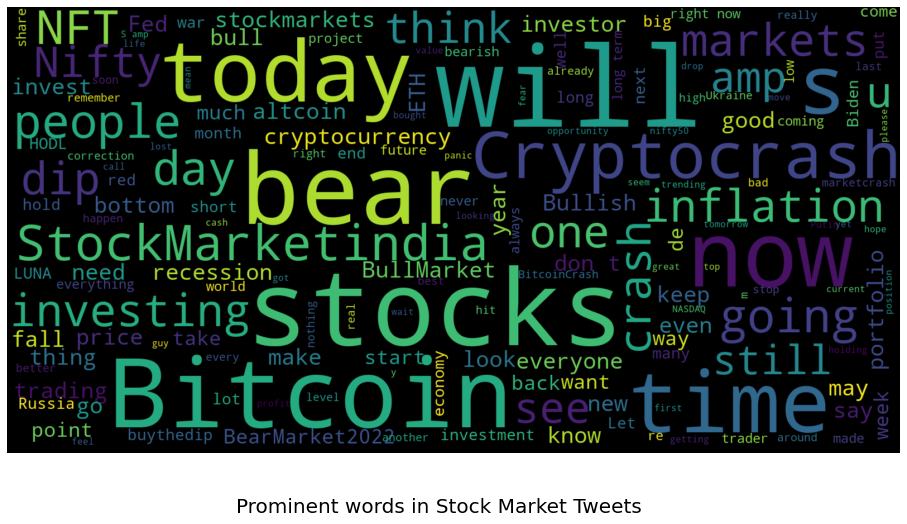

In [8]:
# Displaying the word cloud
display_wordcloud(stkmkt_data['text'], title = 'Prominent words in Stock Market Tweets')

# Sentiment analysis

Using nltk SentimentIntensityAnalyzer, we will be carrying out sentiment analysis of the stock market data in this section.

In [9]:
# I have made reference to code from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert 
# for this cell

# Creating an instance of the nltk sentiment analyser
sia = SentimentIntensityAnalyzer()

# Creating a function to harness the nltk sentiment analyser
def find_tweet_sentiment(tweets):
    if sia.polarity_scores(tweets)["compound"] > 0:
        return "Positive_Tweets"
    elif sia.polarity_scores(tweets)["compound"] < 0:
        return "Negative Tweets"
    else:
        return "Neutral Tweets"       

In [10]:
# After finding the sentiments of the tweets, the next step is to visualise 
# the sentiments of the tweets. To achieve this the following function is created

def plot_tweet_sentiments(tweets, feature, title):
    counts = tweets[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='purple')
    percent.plot(kind='bar', ax=ax2, color='indigo')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Stock Market Tweet Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

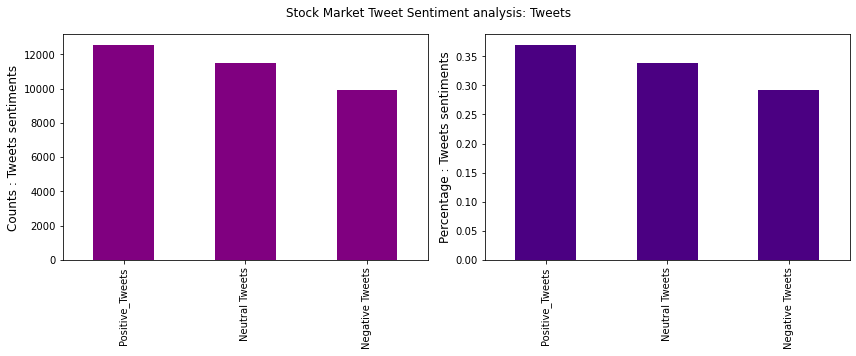

In [11]:
# In this cell, we employ both 'find_tweet_sentiment' and 'plot_tweet_sentiments' functions
# We have decided to plot both the counts and percentage for the tweets.
stkmkt_data['tweet_sentiment'] = stkmkt_data['text'].apply(lambda x: find_tweet_sentiment(x))
plot_tweet_sentiments(stkmkt_data, 'tweet_sentiment', 'Tweets')

From the above plots, we can see that by count and percentage there are more positive tweets than there are neutral tweets and there are more neutral tweets than there are negative tweets. This tells us that the market sentiment is generally positive.However, lets dive a little deeper to explore what constitutes the positive, neutral and negative tweets. 

## Exploring Positive Tweets

In this section, we explore the prominent words associated with positive tweets using the wordcloud package.

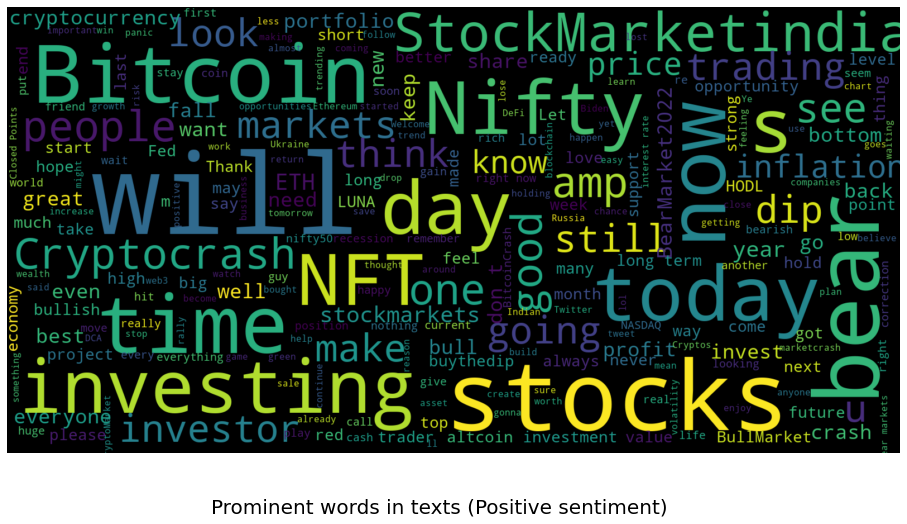

In [12]:
display_wordcloud(stkmkt_data.loc[stkmkt_data['text_sentiment']=='Positive', 'text'], title = 'Prominent words in texts (Positive sentiment)')

From the above word cloud we can see that the prominent words associated with positive tweets include "time", "today", "NFT", "Bitcoin", "bear", "Will" amongst others.

## Exploring Negative Tweets

In this section, we explore the prominent words associated with negative tweets using the wordcloud package.

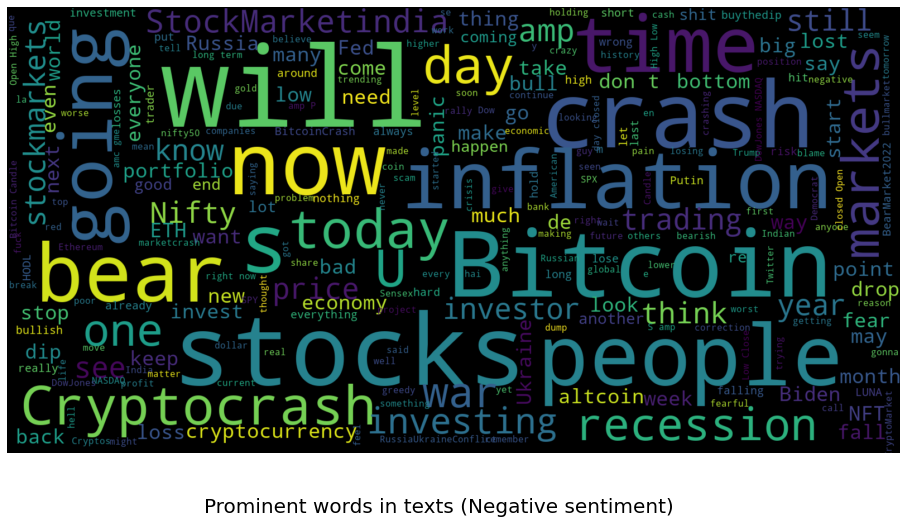

In [13]:
display_wordcloud(stkmkt_data.loc[stkmkt_data['text_sentiment']=='Negative', 'text'], title = 'Prominent words in texts (Negative sentiment)')

From the above word cloud, we can see that the priminent words associated with negative tweets include "inflation", "Will", "crash", "cryptocrash", "people" amongst other words

## Exploring Neutral Tweets

In this section, we explore the prominent words associated with neutral tweets using the wordcloud package.

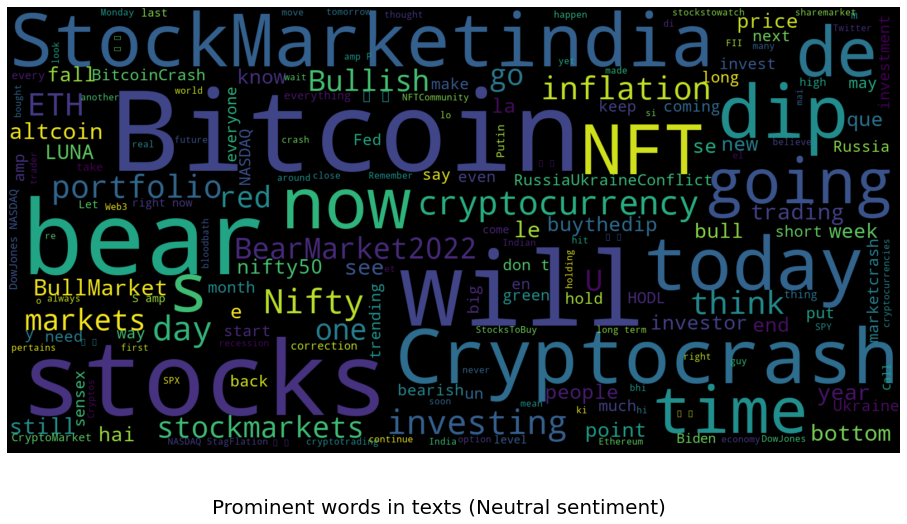

In [14]:
display_wordcloud(stkmkt_data.loc[stkmkt_data['text_sentiment']=='Neutral', 'text'], title = 'Prominent words in texts (Neutral sentiment)')

From the above word cloud, we can see that the prominent words associated with neutral tweets include "Bullish", "Cryptocrash", "Bitcoin", "bear", "NFT" amongts others.

# Test for Polarity and Subjectivity

In addition to the sentiments of the stock martket tweets, we can also get more insights from our dataset. In this case, we will be using TextBlob package to test the sentiments for polarity and subjectivity. Typically, the polarity score is a float within the range -1.0 to 1.0 while the subjectivity test score has a float within the range 0.0 to 1.0, where 0.0 is very objective and 1.0 is very subjective (Dipanjan, 2018).

In [15]:
# Creating a function for polarity test using TextBlob
def tweet_sentiment_polarity_test(tweet):
    blob = TextBlob(tweet)
    polarity = 0
    for sentence in blob.sentences:
        polarity += sentence.sentiment.polarity
    return polarity

# Creating a function for subjectivity test using TextBlob
def tweet_sentiment_subjectivity_test(tweet):
    blob = TextBlob(tweet)
    subjectivity = 0
    for sentence in blob.sentences:
        subjectivity += sentence.sentiment.subjectivity
    return subjectivity

In [16]:
# Performing the polarity and subjectivity tests
stkmkt_data['text_sentiment_polarity'] = stkmkt_data['text'].apply(lambda x: tweet_sentiment_polarity_test(x))
stkmkt_data['text_sentiment_subjectivity'] = stkmkt_data['text'].apply(lambda x: tweet_sentiment_subjectivity_test(x))

In [17]:
# Creating function to visualise the results of the polarity and subjectivity tests.

def plot_sentiment_polarity_subjectivity(tweets, feature, title):
    polarity = tweets[feature+'_sentiment_polarity']
    subjectivity = tweets[feature+'_sentiment_subjectivity']

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    polarity.plot(kind='kde', ax=ax1, color='magenta')
    subjectivity.plot(kind='kde', ax=ax2, color='green')
    ax1.set_ylabel(f'Sentiment polarity : {title}', size=12)
    ax2.set_ylabel(f'Sentiment subjectivity: {title}', size=12)
    plt.suptitle(f"Sentiment analysis (polarity & subjectivity): {title}")
    plt.tight_layout()
    plt.show()

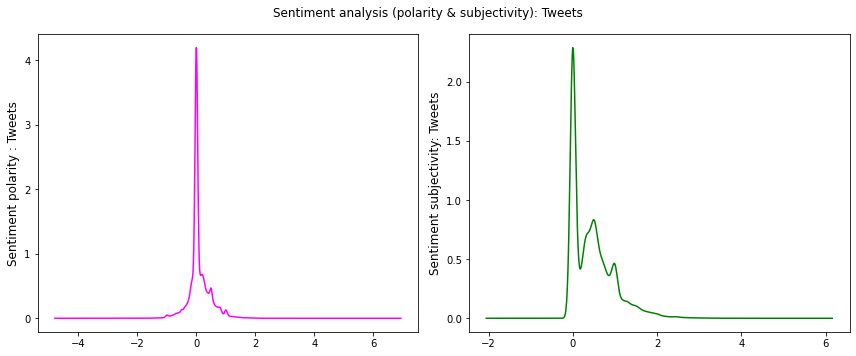

In [18]:
plot_sentiment_polarity_subjectivity(stkmkt_data, "text", 'Tweets')

From the plots above, we can see that the polarity plot appears to be balanced and close to zero. This means that the sentiments are not polarised. We can also see that from the subjectivity plot above, the tweet sentiments are more concentrated around the zero value, which means that the sentiments are very objective.

# References

1. Lehner Investments (2022) Sentiment Analysis – What is market sentiment and how does it affect the stock market?. Available at: https://www.lehnerinvestments.com/en/sentiment-analysis-stock-market-sentiment/ (Accessed: 11 September 2022).

2. Pashupati.G(2020) Sentiments[Transformer & VADER] + Embedding [BERT] Available at: https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert (Accessed: 11 September 2022).
    

3. Dipanjan, S.(2018) Emotion and Sentiment Analysis: A Practitioner’s Guide to NLP Available at: https://www.kdnuggets.com/2018/08/emotion-sentiment-analysis-practitioners-guide-nlp-5.html (Accessed: 11 September 2022).